In [1]:
from utils import plot_text_mel_alignment,  get_duration_from_textgrid
import os, librosa
import numpy as np

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
    textgrid_dir = "/mnt/hdd3/minsu/ICLR2023/mfa/MFAFormatter/result/ESD_dataset/TextGrid"

wav_paths = ["./preprocessed/ESD_dataset/0011_Happy/0011_001000.wav",
            "./preprocessed/ESD_dataset/0011_Neutral/0011_000100.wav"
             
            ]
             #"./preprocessed/ESD_dataset/0011_Happy/0011_000700.wav",
             #"./preprocessed/ESD_dataset/0011_Neutral/0011_000700.wav",
             #"./preprocessed/ESD_dataset/0011_Sad/0011_000700.wav",
             #"./preprocessed/ESD_dataset/0011_Surprise/0011_000700.wav"]

# mel-preprocess settings
sampling_rate = 16000
hop_length=256
win_length = 1024
n_fft = 1024
n_mels = 80
fmin, fmax = 0, 8000

start:  0.32 	end:  0.72 	phone: spn
start:  0.72 	end:  0.76 	phone: W
start:  0.76 	end:  0.81 	phone: AH0
start:  0.81 	end:  0.87 	phone: Z
start:  0.87 	end:  0.93 	phone: HH
start:  0.93 	end:  1.07 	phone: AE1
start:  1.07 	end:  1.16 	phone: F
start:  1.16 	end:  1.21 	phone: W
start:  1.21 	end:  1.32 	phone: EY1
start:  1.32 	end:  1.4 	phone: D
start:  1.4 	end:  1.56 	phone: AW1
start:  1.56 	end:  1.61 	phone: N
start:  1.61 	end:  1.64 	phone: TH
start:  1.64 	end:  1.69 	phone: IY0
start:  1.69 	end:  1.74 	phone: R
start:  1.74 	end:  1.93 	phone: UW1
start:  1.93 	end:  2.04 	phone: M
['W', 'AH0', 'Z', 'HH', 'AE1', 'F', 'W', 'EY1', 'D', 'AW1', 'N', 'TH', 'IY0', 'R', 'UW1', 'M']
(80, 83)
0011_Happy/0011_001000.wav
start:  0.29 	end:  0.4 	phone: W
start:  0.4 	end:  0.5 	phone: EH1
start:  0.5 	end:  0.59 	phone: L
start:  0.59 	end:  0.7 	phone: EH1
start:  0.7 	end:  0.75 	phone: N
start:  0.75 	end:  0.82 	phone: IY0
start:  0.82 	end:  0.91 	phone: HH
start:  0.91 	

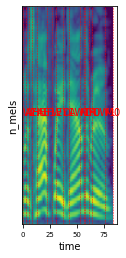

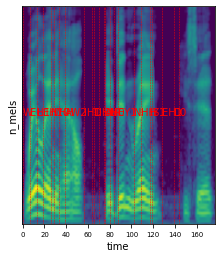

In [3]:
%matplotlib inline

for wav_path in wav_paths:
    wav_filename = "/".join(wav_path.split("/")[-2:])
    textgrid_filepath = os.path.join(textgrid_dir, wav_filename.replace(".wav", ".TextGrid"))
    
    phone_sequence, durations, start_time, end_time = get_duration_from_textgrid(textgrid_filepath, sampling_rate=sampling_rate, hop_length=hop_length)
    print(phone_sequence)
    phone_sequence.append("0")
    durations.insert(0, 0)
    segmentation_boundary = np.cumsum(durations)
    
    wav, sr = librosa.load(wav_path, sr=sampling_rate)
    
    if sr != sampling_rate:
        print("[ERROR] sampling rate doesn't match! ({}) vs ({})".format(sr, sampling_rate))
        break
        
    mel = librosa.feature.melspectrogram(y=wav[start_time:end_time], sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length,
                                                fmin=fmin, fmax=fmax, n_mels=n_mels)
    
    mel = librosa.power_to_db(mel, ref=np.max)
    
    print(mel.shape)
    
    print(wav_filename)
    plot_text_mel_alignment(mel, segmentation_boundary, phone_sequence)

In [4]:
durations

[0, 7, 6, 6, 7, 3, 4, 6, 17, 8, 2, 4, 5, 1, 4, 4, 4, 14, 7, 8, 2, 9, 11, 5]